# Loading All the Modules   

In [18]:
from pdf2image import convert_from_path
import cv2 
import numpy as np
import subprocess
import matplotlib.pyplot as plt


# Specify the File Path

In [19]:
file_path = "./input.pdf"  

images = convert_from_path(file_path, dpi=300, poppler_path=r'./poppler-24.08.0\Library\bin')  
# here poppler is used to convert PDF to images 


# Converting Each image to a .pgm file

In [20]:
names = []
for i, image in enumerate(images):
    gray = image.convert("L")
    
    gray = np.array(gray)
    height, width = gray.shape

    with open(f"images/page_{i+1}.pgm", "wb") as f:
        names.append((i+1 , f"images/page_{i+1}.pgm"))
        f.write(f"P5\n{width} {height}\n255\n".encode())
        f.write(gray.tobytes())
        f.close()

# Extracting the Coordinated from each Page 




In [21]:
tables = {}

for page , file_name in names :
    res = subprocess.run(["./main.exe", file_name], capture_output=True, text=True)
    if res.stdout == "NO TABLES" :
        continue
    coords = []
    for s in res.stdout.split("|") :
        if len(s) > 0 :
            x1 , y1 , x2 , y2 = s.split(" ")
            coords.append([(x1 , y1) , (x2 , y2)])
    tables[page] = list(coords)

# Final Results

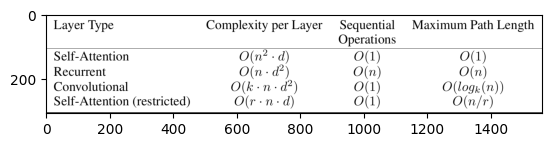

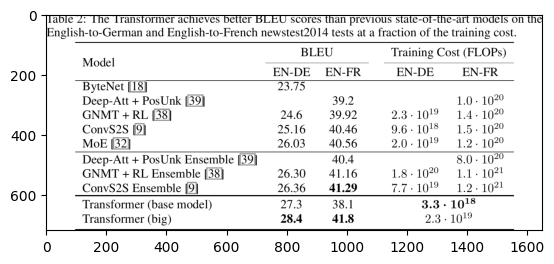

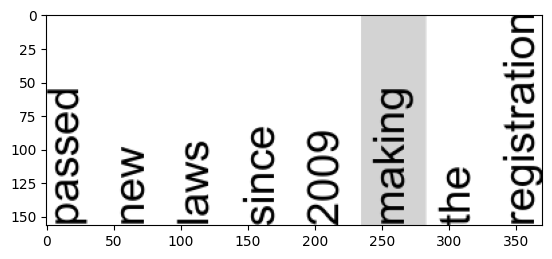

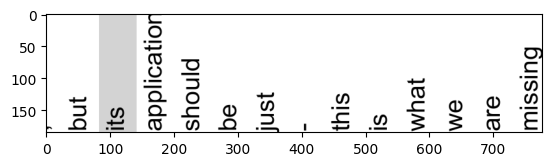

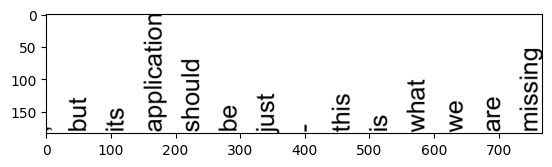

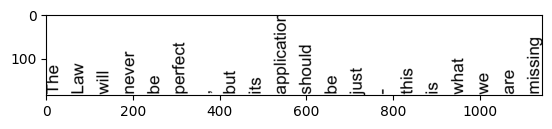

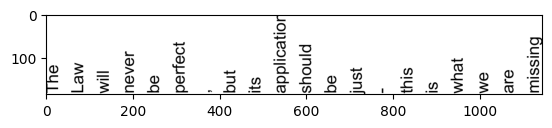

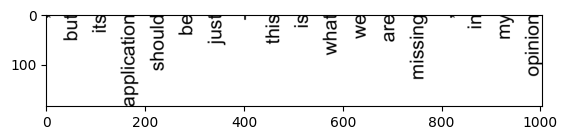

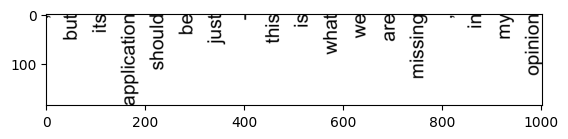

In [22]:
allTableImges = []
for p , c in tables.items():
    if c :
        # print(p , c)
        for temp in c : 
            x1 , y1  = temp[0]
            x2 , y2 = temp[1]
            img = cv2.imread(f"./images/page_{p}.pgm", cv2.IMREAD_UNCHANGED)
            table_img = img[int(y1) : int(y2) ,int( x1) : int(x2)]
            allTableImges.append((p , table_img))
            plt.imshow(table_img , cmap = "gray")
            plt.show()
